<a href="https://colab.research.google.com/github/sahajk04/Tourism-Website-Engagement/blob/main/tourism_website_engagement_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
    
The objective for an online tourism website is to implement a targeted marketing strategy, transitioning from a broad outreach to a digital approach, in collaboration with a social networking platform. The aim is to understand and leverage the digital and social behavior of customers to deliver targeted digital advertisements to users who exhibit a high likelihood of purchasing travel products.

Given the relatively higher cost of digital platform advertisements, precision in model creation becomes paramount. The emphasis is on achieving high accuracy to ensure that the marketing budget is effectively utilized and the digital advertisements effectively reach users with a strong inclination to make travel-related purchases.
    
Recognizing that the propensity to buy tickets varies across different login devices, the task involves developing two separate models—one for laptop users and another for mobile users (where anything other than a laptop is considered as mobile phone usage). This distinction is crucial due to the observed differences in purchasing behavior between these device categories.

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.subplots as sp

import warnings
warnings.filterwarnings("ignore")

colours = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108'];
axtitle_dict = {'family': 'serif','color':  '#010D36','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

In [ ]:
df= pd.read_csv('/kaggle/input/customer-behaviour-tourism-portal/Customer behaviour Tourism.csv')
df

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [ ]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataset contains 11760 rows and 17 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #; font-size: 125%; text-align: left;">
    
The dataset infomation gives an overview of the typical tourism website showing user behaviour.
- The dataset contails **11760 rows and 17 columns**
- There are **7 categorical** and **10 numeric** variables
- Few columns has **missing values** in it
- **Taken Product** is the **target Variable**
    
The dataset requires cleaning, datatype correction & pre-processing.

# Exploratory Data Analysis


# Data Cleaning

Let's start cleaning the data first. We'll start with the Categorical columns, wherein we will identify unique values in each column through a loop, and fix the values wherever we find data issue

#### Categorical
- Lots of Numeric values seems to be tagged as Object, let's find out by checking their values

In [ ]:
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )

for col in cat_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].unique())
    print()

Value counts for column 'Taken_product':
['Yes' 'No']

Value counts for column 'preferred_device':
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

Value counts for column 'yearly_avg_Outstation_checkins':
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

Value counts for column 'member_in_family':
['2' '1' '4' 'Three' '3' '5' '10']

Value counts for column 'preferred_location_type':
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

Value counts for column 'following_company_page':
['Yes' 'No' 'Yeso' nan '1' '0']

Value counts for column 'working_flag':
['No' 'Yes' '0']



<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #; font-size: 125%; text-align: left;">

We can see that unexpected values present in different columns, apart from Null

- preferred_device include different values for same e.g. ANDROID' 'Android
- "*" present in yearly_avg_Outstation_checkins
- "Three" present in member_in_family instead of numeric 3
- "Yeso" instead of Yes in following_company_page along with 1 & 0 & Yes & No
- Working flag includes 0 along with No

Let's fix it one by one

In [ ]:
#Let's first fix the multiple values in preferred device
# Define a mapping for replacement
device_mapping= {'iOS and Android': 'Mobile',
          'iOS' : 'Mobile',
          'ANDROID' : 'Mobile',
          'Android': 'Mobile',
          'Android OS' : 'Mobile',
          'Other': 'Mobile',
          'Others' : 'Mobile',
          'Tab' : 'Mobile'}
df['preferred_device'] = df['preferred_device'].replace(device_mapping)
df['preferred_device'].unique()

array(['Mobile', nan, 'Laptop'], dtype=object)

In [ ]:
# "yearly_avg_Outstation_checkins" has '* ' in it, Let's replace it with NAN
df['yearly_avg_Outstation_checkins']= df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce', downcast='integer')

df['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

In [ ]:
# "member_in_family" column has "['Yes' 'No' 'Yeso' nan '1' '0']", let's change all to numeric
page_mapping= {'Yes': 1,
          'No' : 0,
          'Yeso' : 1}
df['following_company_page'] = df['following_company_page'].replace(page_mapping)
df['following_company_page'].unique()

array([1, 0, nan, '1', '0'], dtype=object)

In [ ]:
# "following_company_page" column has "Three", let's change it to 3
df['member_in_family']= df['member_in_family'].replace('Three',3)

# Post changing, let's fix the datatype
# Post changing, let's fix the datatype
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce', downcast='integer')
df['member_in_family'].unique()

array([ 2,  1,  4,  3,  5, 10], dtype=int8)

In [ ]:
# "following_company_page" column has "Three", let's change it to 3
df['working_flag']= df['working_flag'].replace('0','No')
df['working_flag'].unique()

array(['No', 'Yes'], dtype=object)

- following_company_page, Adult Flag, Traevelling_network_rating should be categorical type

In [ ]:
df[["travelling_network_rating", "Adult_flag"]]= df[["travelling_network_rating", "Adult_flag"]].astype("object")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11684 non-null  float64
 6   member_in_family                              11760 non-null  int8   
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
num_columns = df.select_dtypes(exclude=['object']).drop(columns=['UserID'])

#Negative values : The dataset features can not have negative values, hence let's see.
negative_values = (num_columns < 0).any()
print("Columns with negative values:")
print(negative_values[negative_values].index)


Columns with negative values:
Index([], dtype='object')


- The data cleaning is complete & we now have cleaned data, which need missing treatment & further pre-processing before using for modeling

# Missing Values  


In [ ]:
#- Below are the columns & corresponding missing values
df = df.applymap(lambda x: np.nan if x == 'nan' else x) #Replacing all string NaN values to Np.nan, in case any

In [ ]:
#Let's see how much are the missing values from the datset
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET}, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")


The total number of missing values are 1433, which is 0.72% of total data.


In [ ]:
# Lets check count & % of missing values in the dataset
missing = df.columns[df.isna().any()].tolist()
total_rows = len(df)
for column in missing:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{missing_count}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")


Yearly_avg_view_on_travel_page has 581 missing values, which is 4.94% of the column.
preferred_device has 53 missing values, which is 0.45% of the column.
total_likes_on_outstation_checkin_given has 381 missing values, which is 3.24% of the column.
yearly_avg_Outstation_checkins has 76 missing values, which is 0.65% of the column.
preferred_location_type has 31 missing values, which is 0.26% of the column.
Yearly_avg_comment_on_travel_page has 206 missing values, which is 1.75% of the column.
following_company_page has 103 missing values, which is 0.88% of the column.
Adult_flag has 1 missing values, which is 0.01% of the column.
Daily_Avg_mins_spend_on_traveling_page has 1 missing values, which is 0.01% of the column.


<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #; font-size: 125%; text-align: left;">

#### Imputing Missing Values
None of the columns have more high missing values, hence,we will treat these
- We will impute all missing in **categorical** using **Mode**
- For all **Numeric**, we will use **Median**

In [ ]:
cat_columns = ['preferred_device', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
for i in cat_columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [ ]:
num_columns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'Daily_Avg_mins_spend_on_traveling_page']
for column in num_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [ ]:
#Let's check missing values post treatmenr
print('Missing Values in the dataset after treatment :', df.isnull().sum().sum())

Missing Values in the dataset after treatment : 0


# Duplicate Values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[["travelling_network_rating", "Adult_flag"]]= df[["travelling_network_rating", "Adult_flag"]].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11760 non-null  object 
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  float64
 6   member_in_family                              11760 non-null  int64  
 7   preferred_location_type                       11760 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

# Descriptive Summary


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11760.0,2.803452e+02,66.511330,35.0,233.00,271.0,322.00,464.0
total_likes_on_outstation_checkin_given,11760.0,2.816742e+04,14150.080463,3570.0,16697.25,28076.0,40115.25,252430.0
yearly_avg_Outstation_checkins,11760.0,8.196259e+00,8.650950,1.0,1.00,4.0,14.00,29.0
member_in_family,11760.0,2.921344e+00,1.044883,1.0,2.00,3.0,4.00,10.0
Yearly_avg_comment_on_travel_page,11760.0,7.479371e+01,23.815280,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866088e+01,48.660793,4.0,17.00,22.0,27.00,500.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,1.381760e+01,9.070604,0.0,8.00,12.0,18.00,270.0


<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #; font-size: 125%; text-align: left;">

1. **User Engagement Metrics:** Users exhibit **varied engagement levels** on the platform, as reflected in metrics such as yearly average views on the travel page, total likes on outstation check-ins, and yearly average comments on the travel page.
2. **User Demographics:** User demographics indicate an **average family size of approximately 2.88 members**, with variability observed.
3. **Check-in Behavior:** Users tend to engage in an **average of 8.10 outstation check-ins per year**, with some variability in behavior. The duration since the **last outstation check-in** shows variability, potentially influencing current engagement levels.
4. **Social Interaction:** Social interaction plays a significant role, as seen in the metrics for **total likes on out-of-station check-ins received** and **monthly comments on the company page**. These metrics shows the importance of user interactions within the platform.
5. **Platform Usage Patterns:** Users spend an **average of 13.64 minutes daily on the traveling page**, with variability in daily engagement.

In [ ]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11760,2,Mobile,10652
preferred_location_type,11760,15,Beach,2455
following_company_page,11760,4,0,8458
working_flag,11760,2,No,9952
travelling_network_rating,11760,5,3,3672
Adult_flag,11760.0,4.0,0.0,5048.0


<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #; font-size: 125%; text-align: left;">

1. **User Preferences and Behavior:** The majority of users have **not taken a specific product** ("Taken_product: No") and prefer accessing the platform through **mobile devices** ("Preferred_device: Mobile"). This suggests the data is imbalance
2. **Location Preferences:** The most frequent **preferred location type** is the **"Beach"**, indicating a notable interest in beach-related destinations among users.
3. **Social Interaction and Employment Status:** A significant portion of users is **not actively following company pages** ("Following_company_page: 0") and may currently be **unemployed** ("Working_flag: No").

# Data Visualization

In [ ]:
# Distribution of Target Variable
fig = px.pie(
    df.assign(ClassMap=df.Taken_product.map({'No': "Not Taken", "Yes": "Taken"})),
    names="ClassMap", hole=0.5,color_discrete_sequence=["#79a5db", "#e0a580"])
fig.update_layout(height=450,width=600, font_color="#28838a",title_font_size=16,  showlegend=False,)
fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",yref="paper", showarrow=False, font_size=20, text="Target<br>Overview",)
fig.update_traces(hovertemplate=None, textposition="outside", texttemplate="%{label}<br>%{value} - %{percent}",
    textfont_size=16,rotation=-20, marker_line_width=25,  marker_line_color='#ffffff',)
fig.show()

    
# Distribution of Numerical variables

Let's check an overview of how each feature is distributed. We'll plot a **histogram to check the distribution outliers**. Further, we'll print the descriptive statistics of each feature along with **Skewness & Kurtosis**

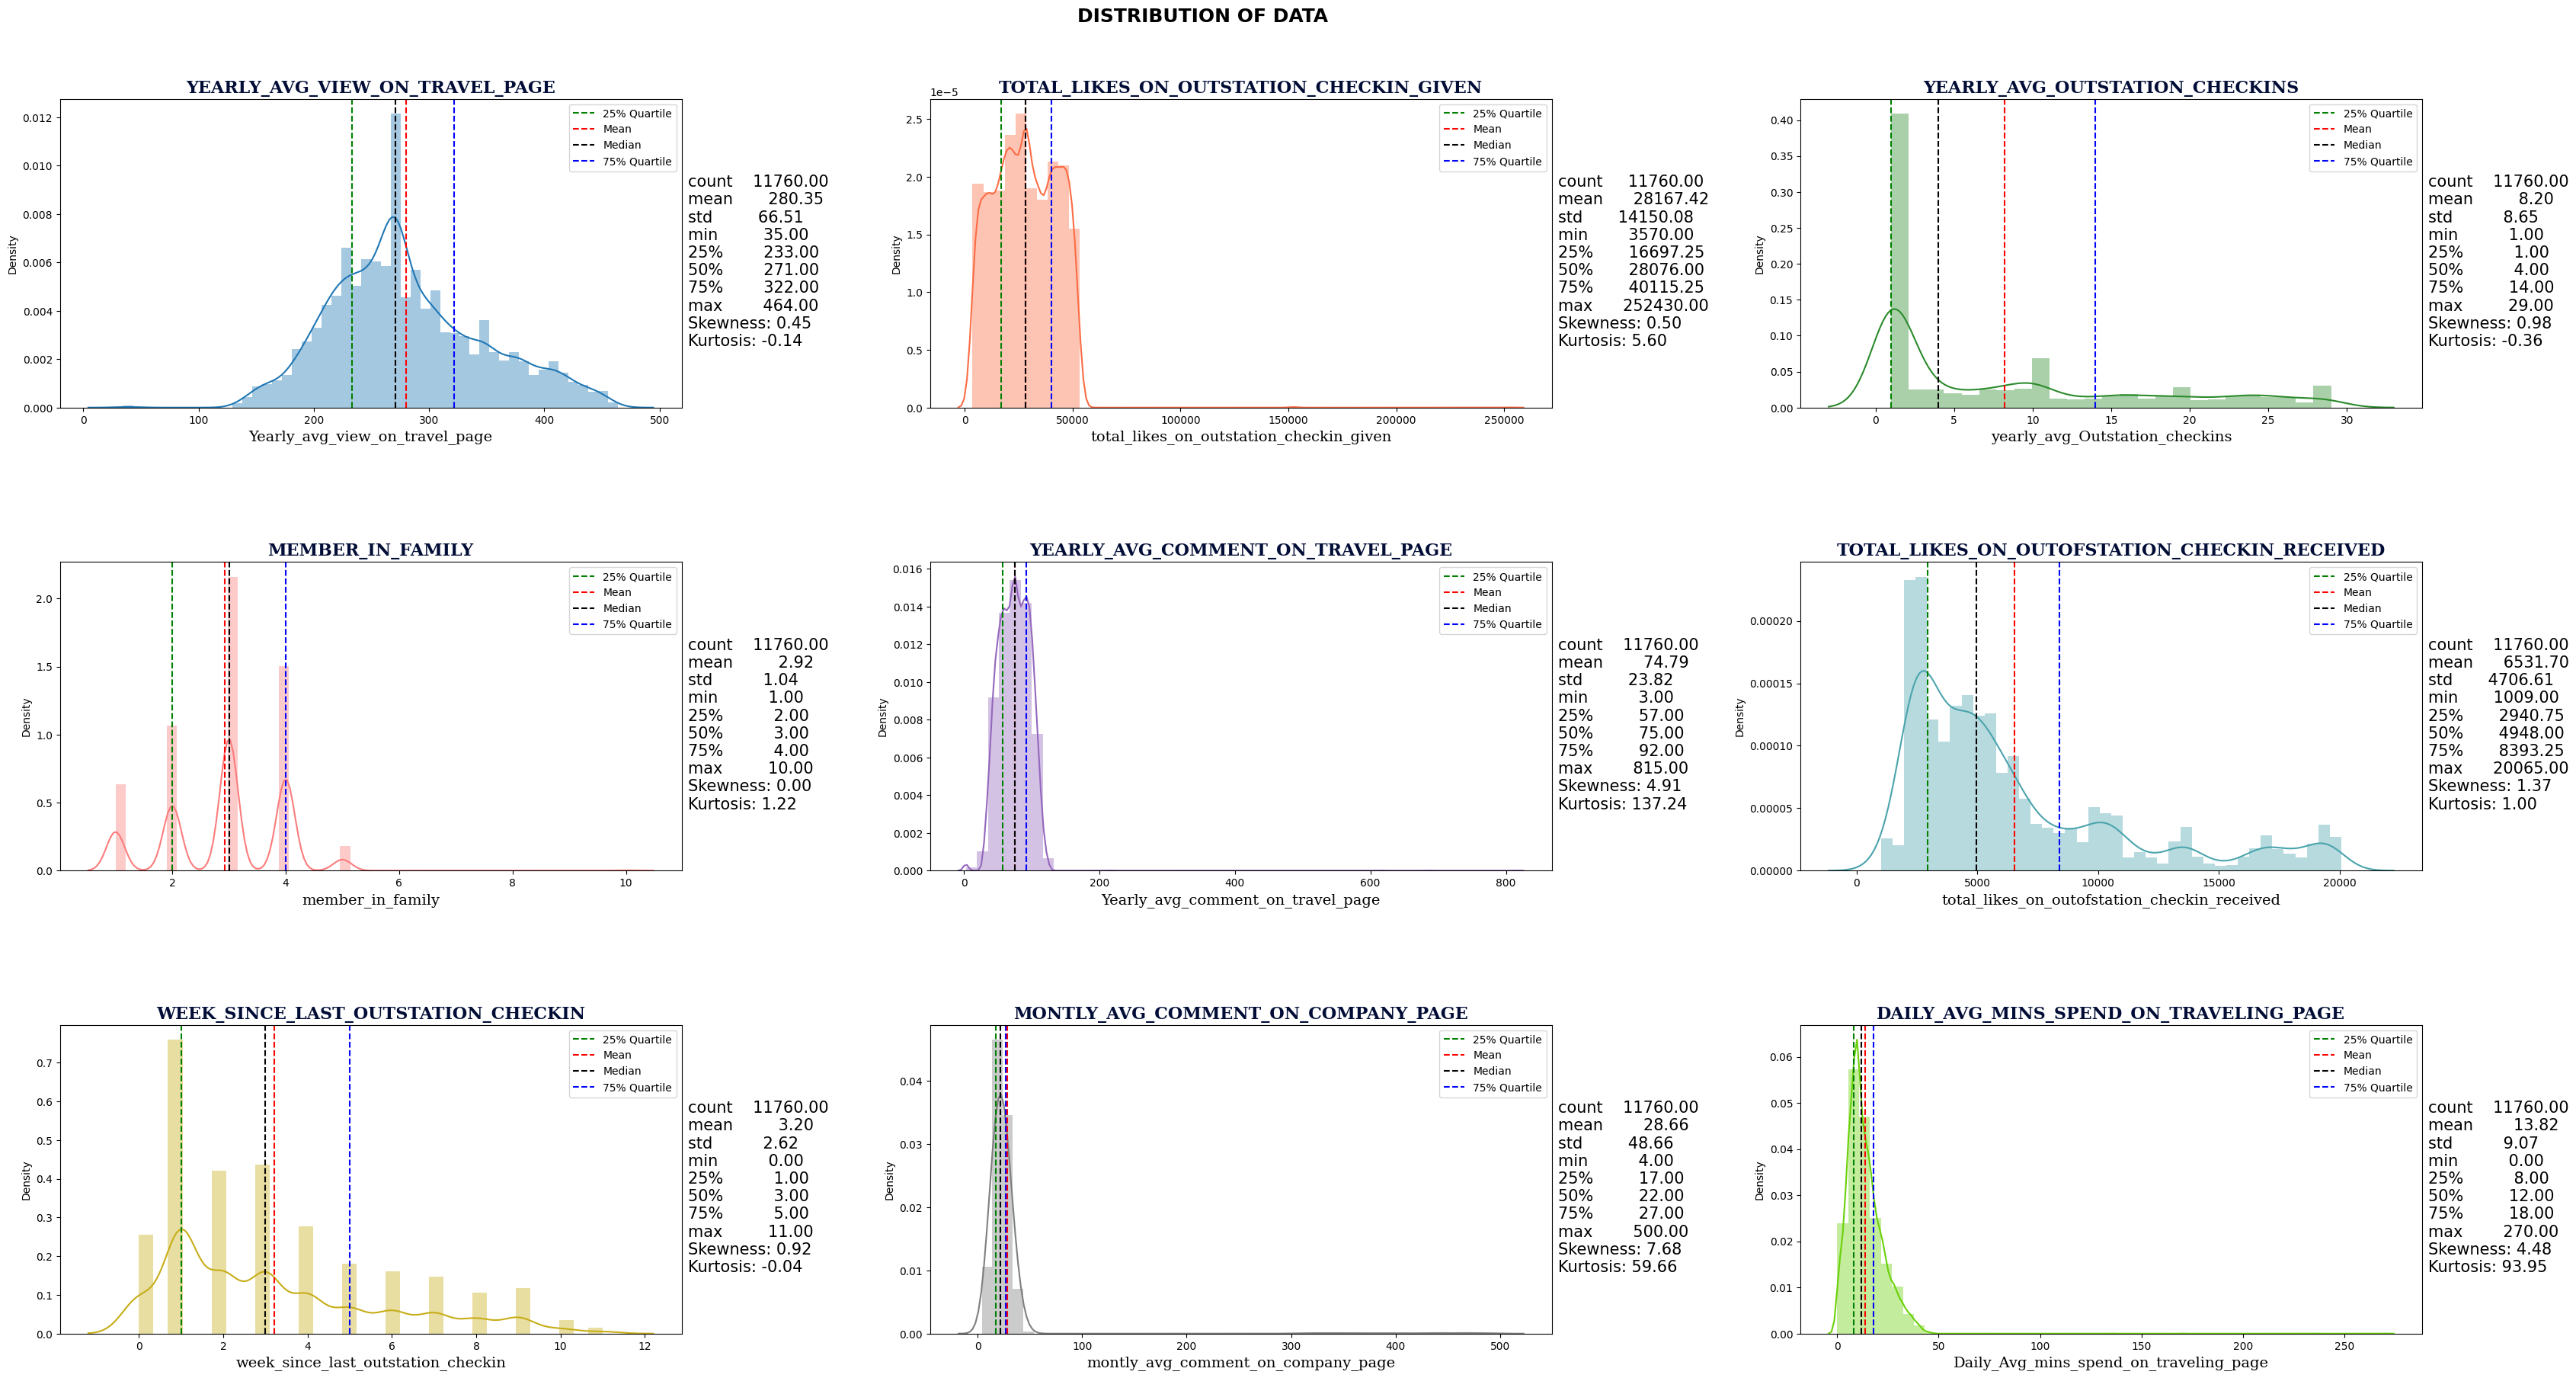

In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('UserID')

# Distribution of Numeric Columns
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[40, 20])
fig.suptitle('DISTRIBUTION OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(num_columns):
    ax = fig.add_subplot(3, 3, i + 1)
    # Plot the histogram
    sns.distplot(df[col], color=colours[i], ax=ax)
    ax.axvline(df[col].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='black', linestyle='--', label='Median')
    ax.axvline(df[col].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
    skewness = round(df[col].skew(), 2)
    kurtosis = round(df[col].kurtosis(), 2)
    description_lines = [line for line in str(df[col].describe().round(2)).split('\n') if 'Name' not in line and 'dtype' not in line]
    description_text = '\n'.join(description_lines)
    description_text += f"\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
    ax.annotate(description_text, xy=(1.01, 0.2), xycoords='axes fraction', fontsize=15)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}', fontdict=axtitle_dict)
    ax.legend(fontsize=10)
plt.show()

<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #; font-size: 125%; text-align: left;">

1. **Skewness:** The data displays varying degrees of **skewness**, indicating the asymmetry in distribution, and kurtosis, reflecting the tails' thickness. For instance, outstation check-ins and likes received have notable skewness and higher kurtosis, suggesting potential concentration in certain ranges.
2. **Outliers:** While most features do not show extreme outliers, some exhibit variability, particularly in outstation check-ins, likes received, and family size.
3. **User Interaction Insights:**  Users commonly engage in commenting on travel and company pages, with noticeable variability in the number of likes given and received.

# Distribution of Categorical variables  

In [ ]:
df.travelling_network_rating.value_counts()

travelling_network_rating
3     3672
4     3455
2     2424
1     2208
10       1
Name: count, dtype: int64

- In network travelling_network_rating,it shows 1 value having 10, let's drop it

In [ ]:
df= df[df['travelling_network_rating'] != 10]

In [ ]:
cat_colums = df.select_dtypes(include = ['object'])
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("----------------------------------------------------------------")
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_colums[cols].value_counts()
    # Count plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie(
        values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation(
        x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in cat_colums:
    univariateAnalysis_category(x)

Distribution of Taken_product
----------------------------------------------------------------


       
Distribution of preferred_device
----------------------------------------------------------------


       
Distribution of preferred_location_type
----------------------------------------------------------------


       
Distribution of following_company_page
----------------------------------------------------------------


       
Distribution of working_flag
----------------------------------------------------------------


       
Distribution of travelling_network_rating
----------------------------------------------------------------


       
Distribution of Adult_flag
----------------------------------------------------------------


<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #; font-size: 125%; text-align: left;">

1. **Digital Engagement:**  The high preference for **Mobile usage (90.58%)** suggests a strong emphasis on digital engagement.
2. **Travel Preferences:** Travel location preferences exhibit diversity, with top choices including Beach, Financial areas, and Historical sites.
3. **User Interaction with Company:** A significant proportion, **71.93%**, does not follow the company page, emphasizing the need for strategic efforts to boost engagement and brand loyalty.
4. **Occupational Influence:** The majority of users, **84.62%**, are not employed.

# Bivariate Analysis of Numeric Features  


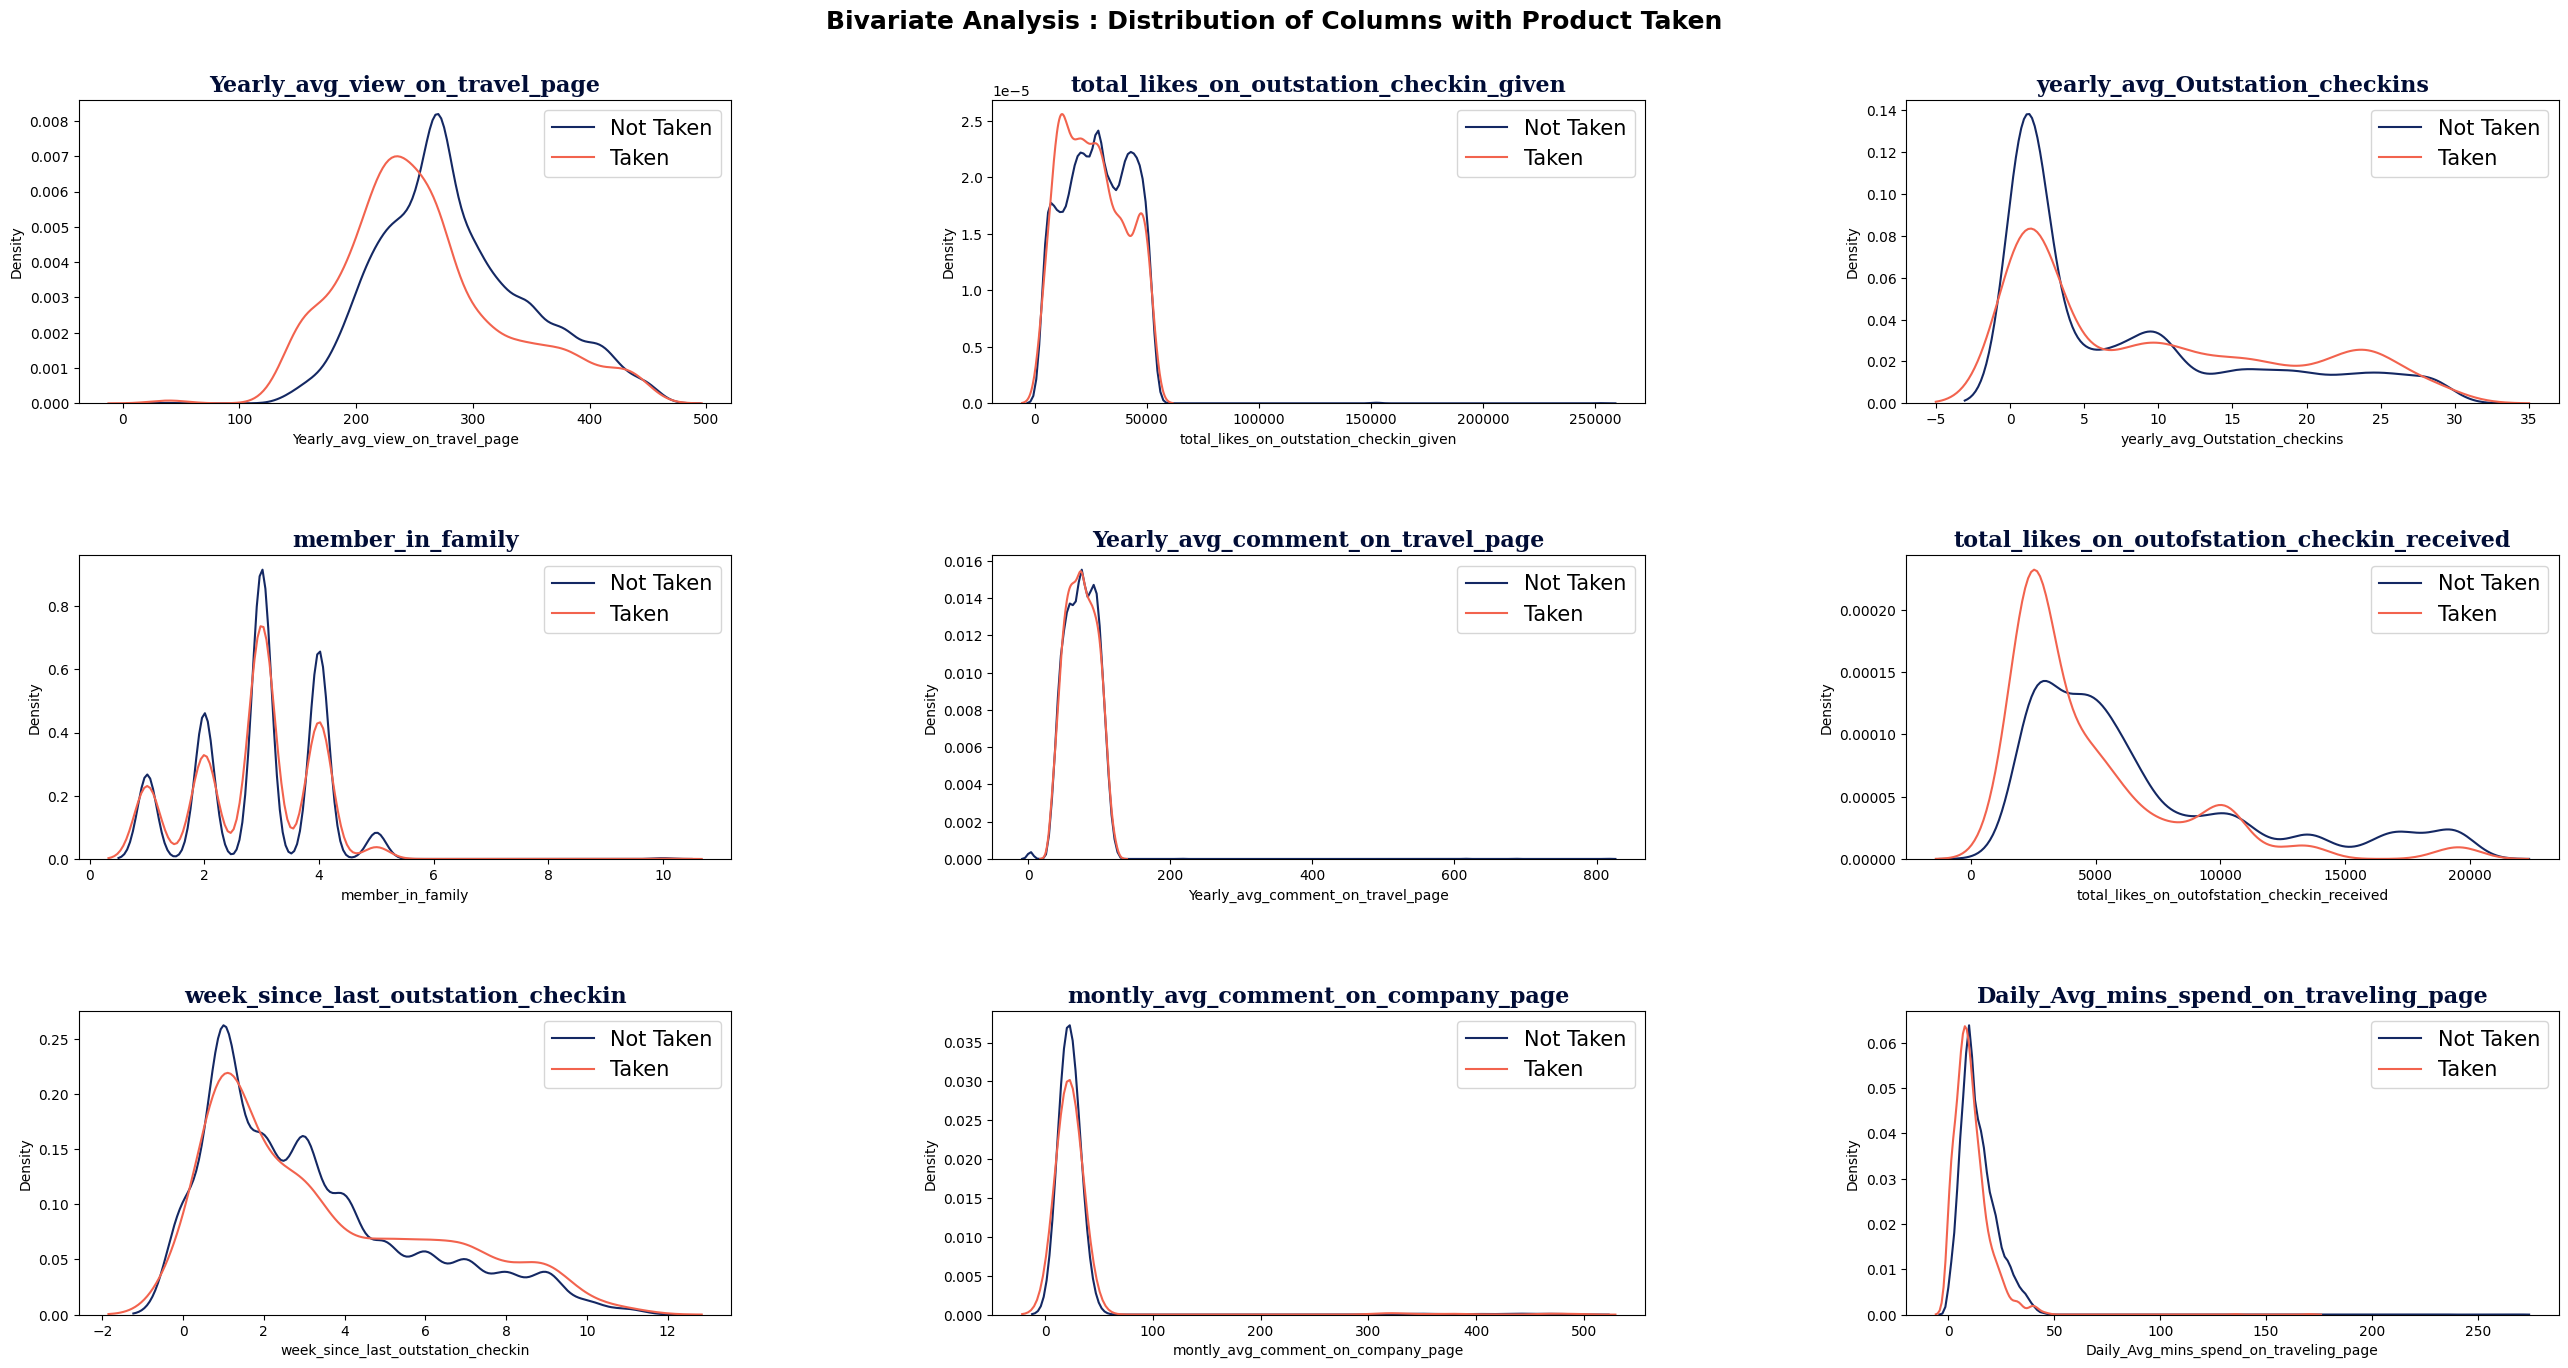

In [ ]:
fig = plt.figure(figsize=[32, 15])
fig.suptitle('Bivariate Analysis : Distribution of Columns with Product Taken ', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(num_columns):
    a = fig.add_subplot(3, 3, i+1)
    sns.distplot(df[df['Taken_product'] == "No"][col], color='#142863', ax=a, hist=False, label='Not Taken')
    sns.distplot(df[df['Taken_product'] == "Yes"][col], color='#f2634e', ax=a, hist=False, label='Taken')
    a.set_title(col, fontdict=axtitle_dict)
    a.legend(fontsize=15)

# Correlation heatmap  

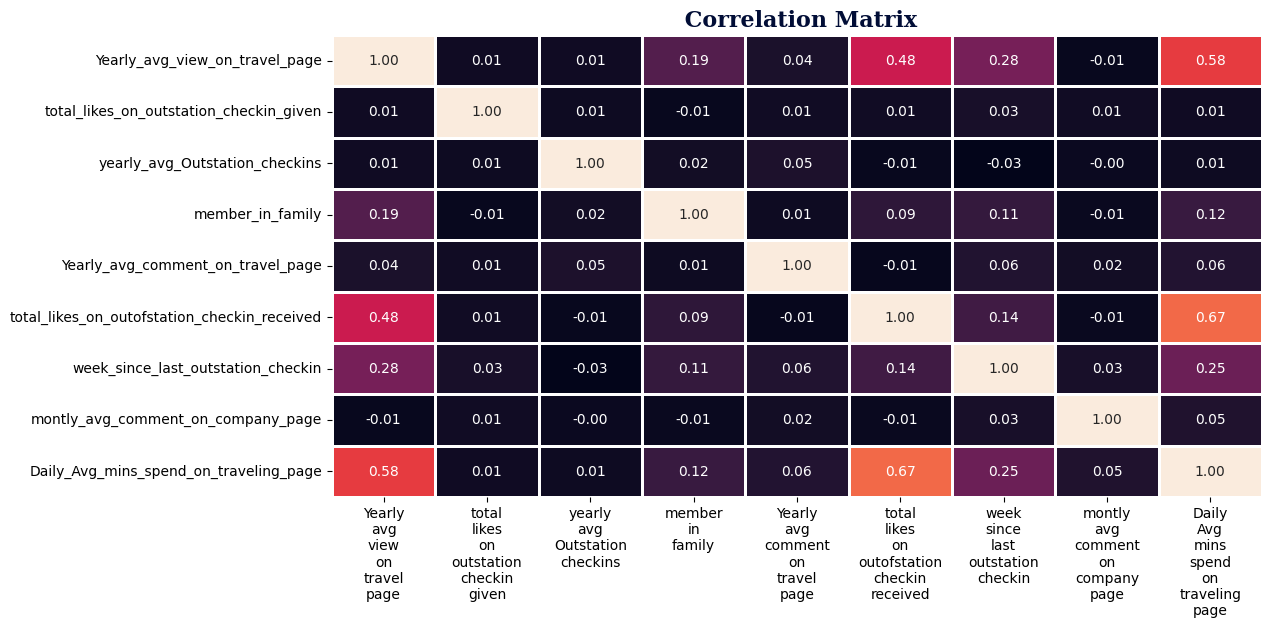

In [ ]:
#Correlation heatmap
corr = df[num_columns].corr(method='pearson')
fig = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, linewidth=0.9)
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')
ax.set_title(' Correlation Matrix', fontdict=axtitle_dict)
plt.show()

<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #; font-size: 125%; text-align: left;">

1. **Engagement Patterns:**
   - Users who spend more time viewing travel content on the platform also tend to spend more time engaging with travel-related activities, as evidenced by the **moderate positive correlation** between **yearly average views on the travel page** and **daily average minutes spent on the traveling page (0.58)**.
2. **Social Interaction Impact:**
   - **Social interaction** plays a significant role in user engagement, with a **strong positive correlation (0.67)** observed between **total likes on out-of-station check-ins received** and **the daily average minutes spent on the traveling page**. This indicates that users receiving more likes on their check-ins are likely to spend more time on the platform.
3. **Content Diversity and Family Dynamics:**
   - There is a **weak positive correlation (0.19)** between **the yearly average views on the travel page** and **the number of family members**, suggesting a slight association between family dynamics and engagement with travel content. Additionally, the correlation with **weeks since the last out-station check-in (0.28)** indicates that user engagement might vary based on the recency of travel-related activities.

# Outlier Treatment  

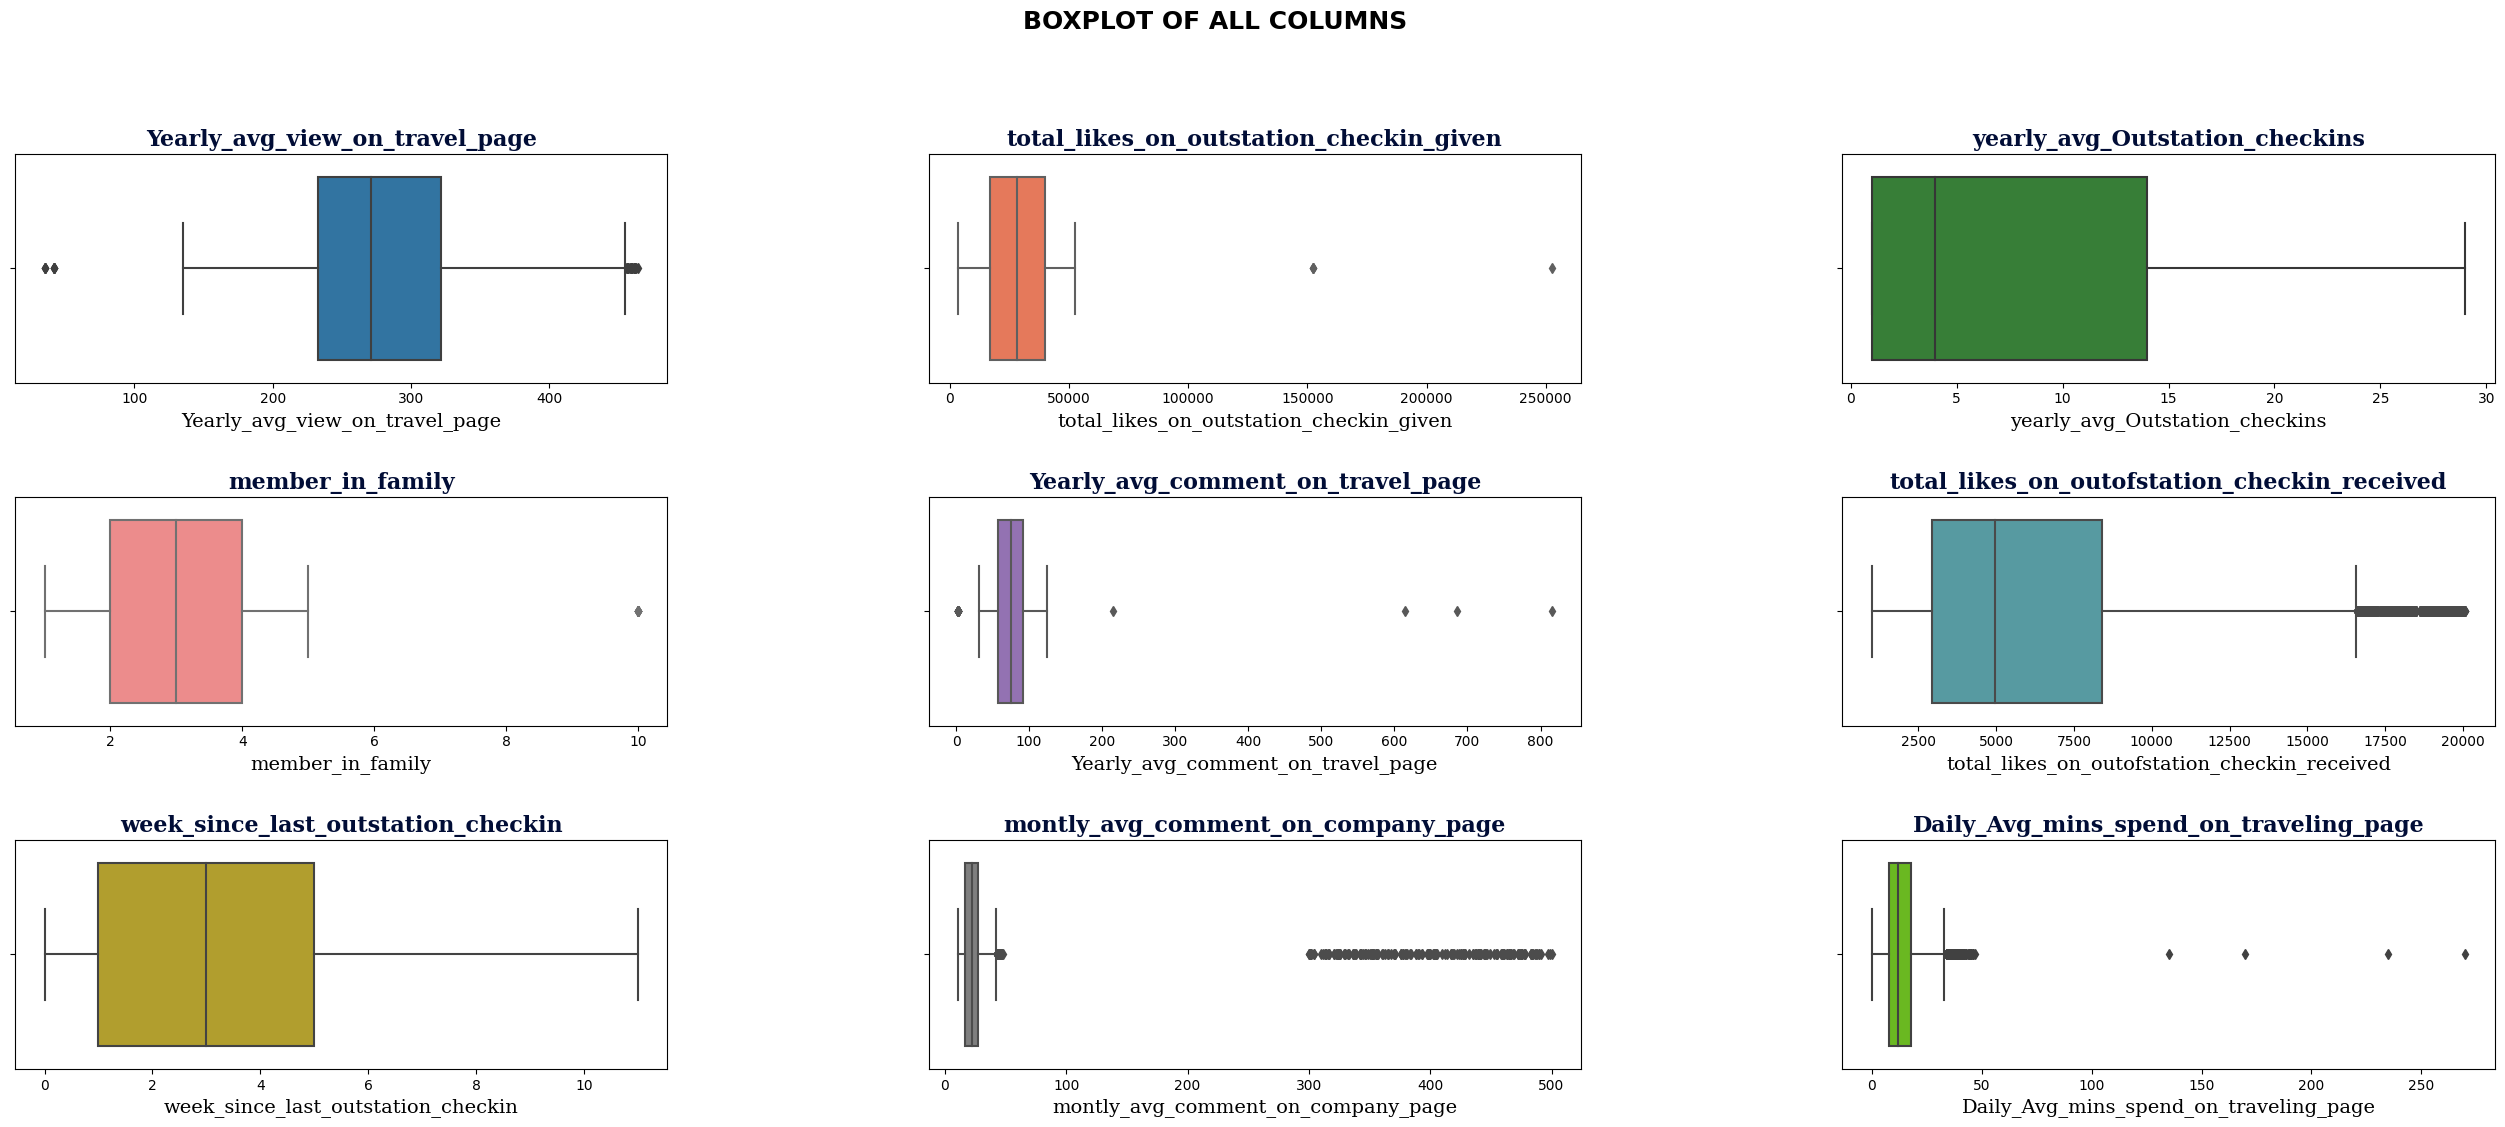

In [ ]:
#Outliers in each Columns
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_columns):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

In [ ]:
#Checking numbers of observations beyond Upper & Lower Limit
Q5 = df[num_columns].quantile(0.05)
Q95 = df[num_columns].quantile(0.95)
UL = Q95
LL = Q5
outliers = ((df[num_columns] > UL) | (df[num_columns] < LL)).sum()
print("Number of Observations Beyond Upper & Lower Limit for Each Column:")
display(outliers)

Number of Observations Beyond Upper & Lower Limit for Each Column:


Yearly_avg_view_on_travel_page                  1168
total_likes_on_outstation_checkin_given         1175
yearly_avg_Outstation_checkins                   491
member_in_family                                 395
Yearly_avg_comment_on_travel_page               1122
total_likes_on_outofstation_checkin_received    1170
week_since_last_outstation_checkin               198
montly_avg_comment_on_company_page              1006
Daily_Avg_mins_spend_on_traveling_page          1040
dtype: int64

In [ ]:
#Function which returns the Upper and Lower limit to detect outliers for each feature
def treat_outlier(col):
    q5  , q95 = np.percentile(col, [5, 95])
    return q5, q95

for i in num_columns:
    LR, UR  = treat_outlier(df[i])
    df[i] = np.where(df[i] > UR, UR, df[i])
    df[i] = np.where(df[i] < LR, LR, df[i])

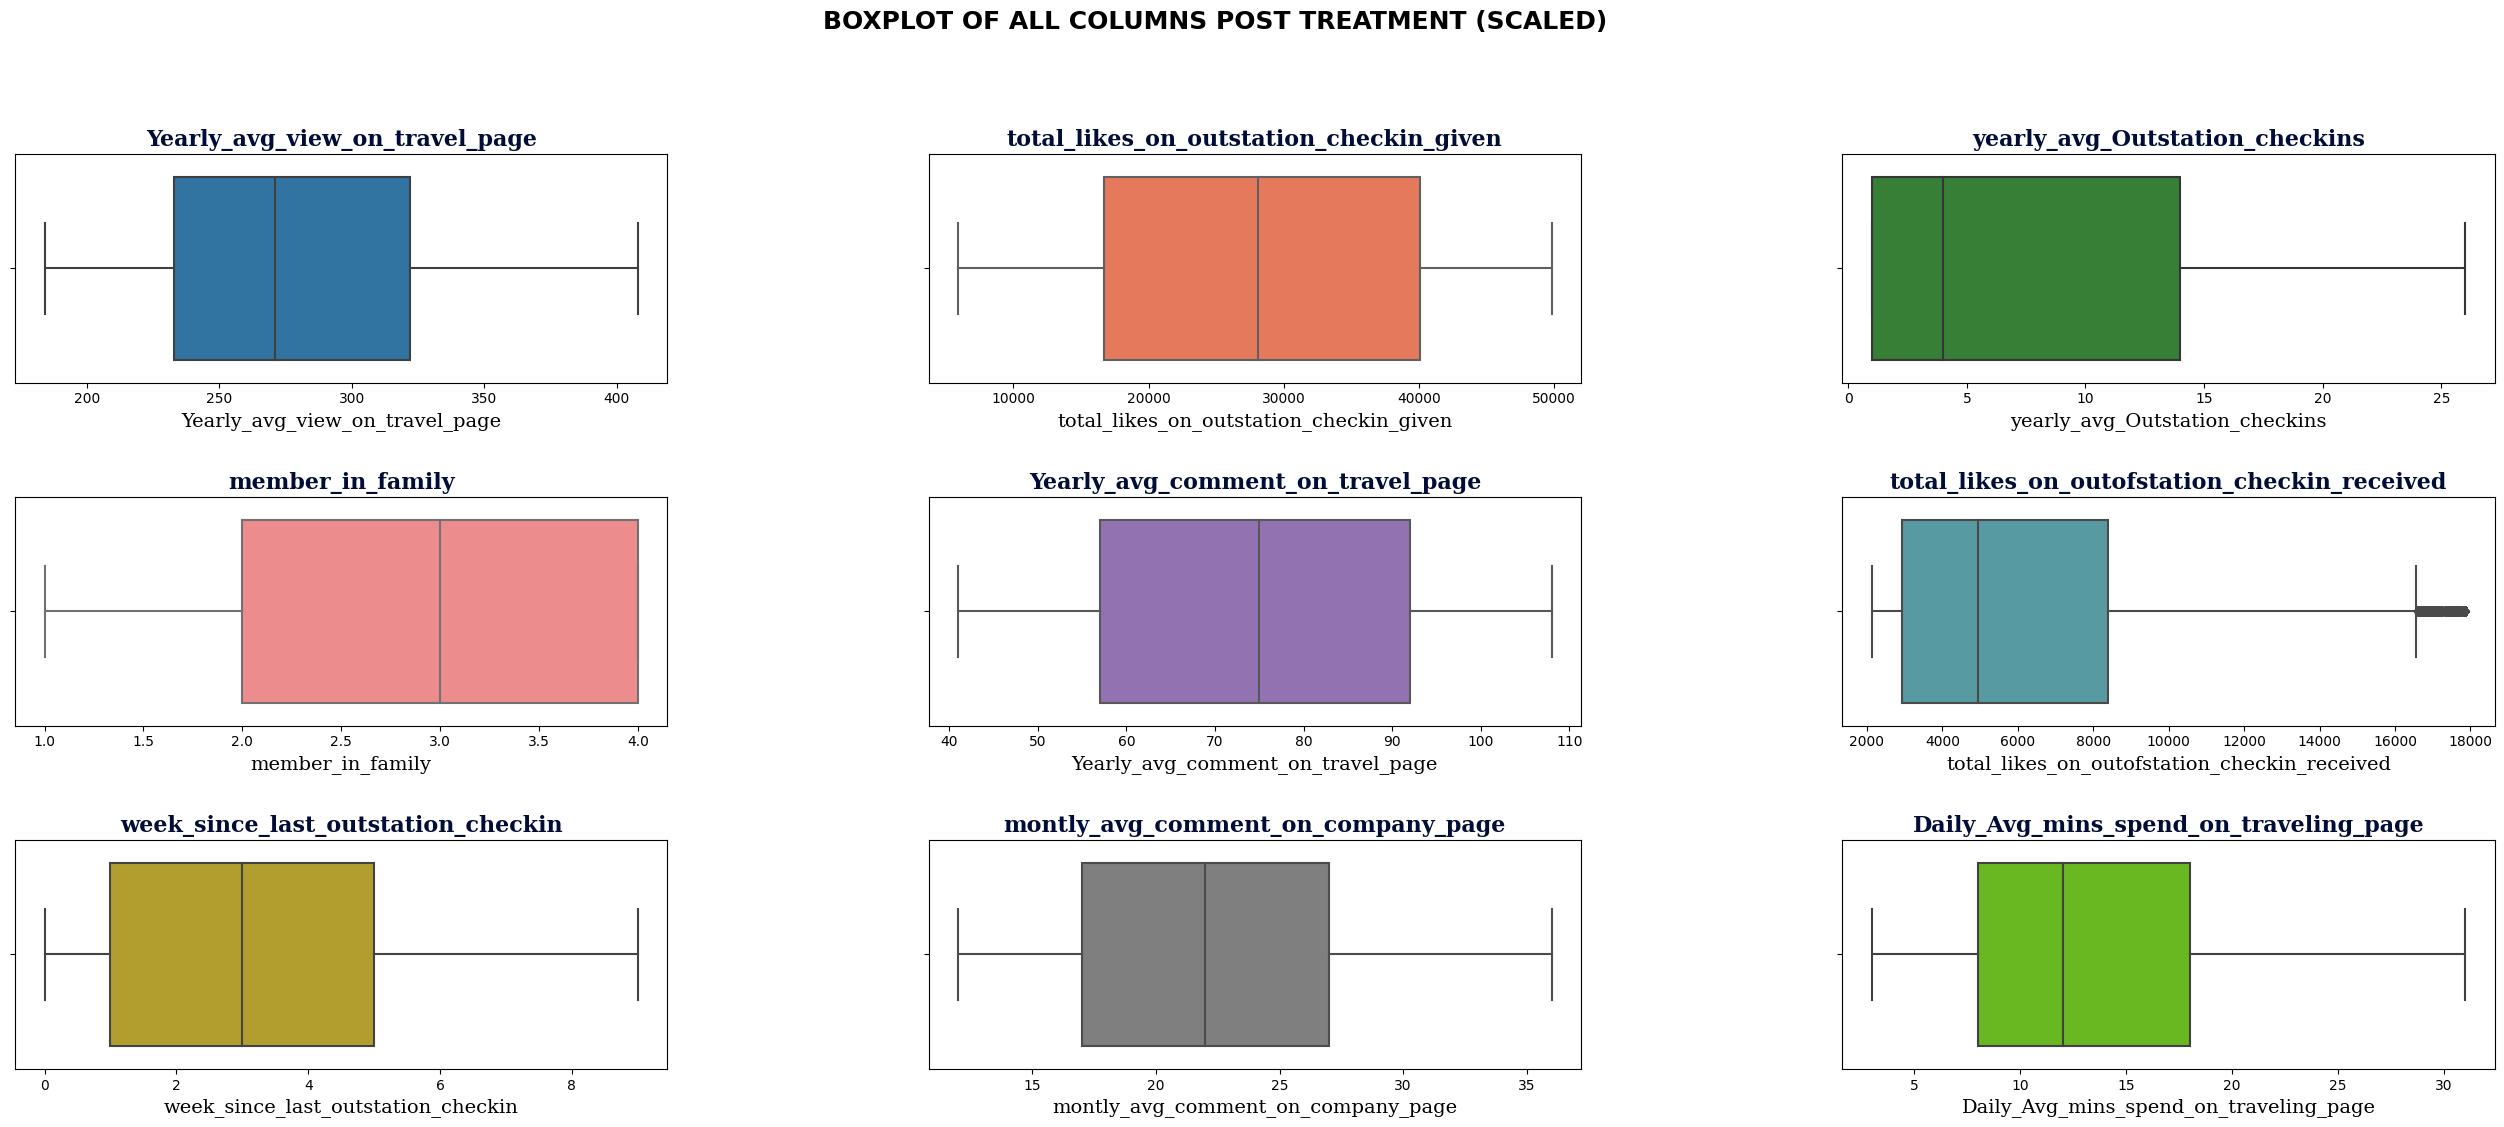

In [ ]:
#Outliers in each Columns
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS POST TREATMENT (SCALED)', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_columns):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

# Inferences from EDA

    
- **Device Prefrence :**  With 90.58% of users preferring mobile devices, prioritize mobile optimization for all digital content, including advertisements, website, and applications

- **Enhancing Engagement:** The majority of users (71.93%) do not follow the company page, indicating a potential gap in user engagement. Develop strategies to increase company page followers by providing valuable and relevant content. Engage users through interactive posts, surveys, and promotions to foster a sense of community and loyalty.
4. **Understanding Non-Working Majority:** The dominance of non-working users (84.62%) suggests the need for tailoring marketing strategies. Consider offering flexible travel packages, discounts during off-peak hours, or special promotions for this user segment.

5. **Addressing Travelling Network Ratings:** The distribution of ratings, particularly with a significant percentage at '3' (31.23%) and '4' (29.38%), highlights the importance of addressing user feedback. Implement improvements to enhance overall satisfaction and provide a positive user experience

6. **Demographic Tailoring for User Segments:** Considering the diverse distribution in the Adult Flag category, with significant proportions in '0.0' (42.92%) and '1.0' (40.55%), tailoring services and promotions based on user age groups can lead to more effective and targeted marketing efforts.
